## Recommender System

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

ratings_list = [i.strip().split("::") for i in open('ratings.dat', 'r').readlines()]
users_list = [i.strip().split("::") for i in open('users.dat', 'r').readlines()]
movies_list = [i.strip().split("::") for i in open('movies.dat', 'r',encoding='latin-1').readlines()]

ratings_df = pd.DataFrame(ratings_list, columns = ['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype = int)
movies_df = pd.DataFrame(movies_list, columns = ['MovieID', 'Title', 'Genres'])
user_df=pd.DataFrame(users_list, columns=['UserID','Gender','Age','Occupation','ZipCode'])

In [61]:
# Change MovieID as numeric values
movies_df['MovieID'] = movies_df['MovieID'].apply(pd.to_numeric)
# Change UserID and Age as numeric values
user_df['UserID'] = user_df['UserID'].apply(pd.to_numeric)
user_df['Age'] = user_df['Age'].apply(pd.to_numeric)

In [80]:
user_df.head()

,UserID,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [96]:
user_df.describe()

,UserID,Age
count,6040.000000,6040.000000
mean,3020.500000,30.639238
std,1743.742145,12.895962
min,1.000000,1.000000
25%,1510.750000,25.000000
50%,3020.500000,25.000000
75%,4530.250000,35.000000
max,6040.000000,56.000000


In [3]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [97]:
ratings_df.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [5]:
R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
R_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Largest rated movie

Top 5 rated movies :

In [7]:
ratings_df['MovieID'].value_counts().head()

2858    3428
260     2991
1196    2990
1210    2883
480     2672
Name: MovieID, dtype: int64

(array([  39.,   63.,  198.,  325.,  537.,  864.,  888.,  627.,  151.,   14.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

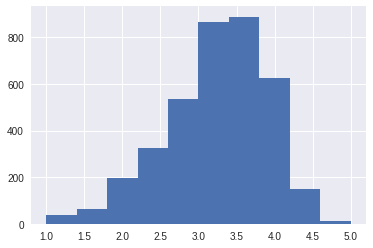

In [18]:
plt.hist(ratings_df.groupby(['MovieID'])['Rating'].mean().sort_values(axis=0, ascending=False))

### Most of the movies in between 3 to 4

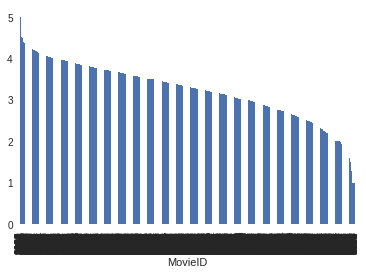

In [27]:
ratings_df.groupby(['MovieID'])['Rating'].mean().sort_values(axis=0, ascending=False).plot(kind='bar')

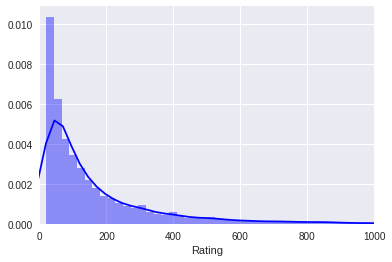

In [34]:
user_rating_count = ratings_df.groupby(['UserID'])['Rating'].count()
ax = sns.distplot(user_rating_count, color="b",bins=100)
plt.xlim(0,1000)
plt.show()

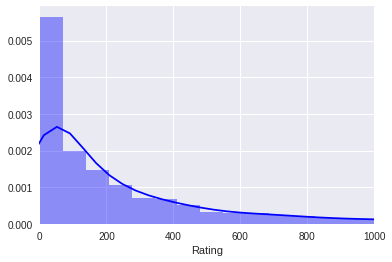

In [37]:
movie_rating_count = ratings_df.groupby(['MovieID'])['Rating'].count()
ax = sns.distplot(movie_rating_count, color="b",bins=50)
plt.xlim(0,1000); plt.show()

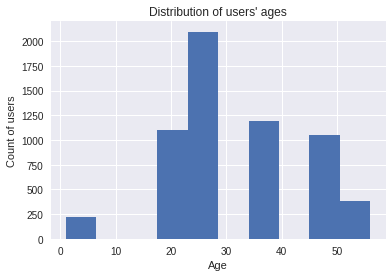

In [85]:
user_df.Age.plot.hist()
plt.title("Distribution of users' ages")
plt.ylabel('Count of users')
plt.xlabel('Age');

## Create one merged DataFrame

In [64]:
movie_ratings = pd.merge(movies_df, ratings_df)
df=pd.merge(movie_ratings,user_df)

### Top most rated movies

In [67]:
most_rated = df.groupby('Title').size().sort_values(ascending=False)[:25]
most_rated.head(10)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

### Top Rated movies with minimum 150 ratings

In [77]:
movie_stats = df.groupby('Title').agg({'Rating': [np.size, np.mean]})
movie_stats.Rating[movie_stats.Rating['size'] > 150].sort(['mean'],ascending=[0]).head()

/home/rishikesh/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,size,mean
Title,,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),628,4.560510
"Shawshank Redemption, The (1994)",2227,4.554558
"Godfather, The (1972)",2223,4.524966
"Close Shave, A (1995)",657,4.520548
"Usual Suspects, The (1995)",1783,4.517106


In [89]:
df.reset_index('MovieID', inplace=True)

In [91]:
pivoted = df.pivot_table(index=['MovieID', 'Title'],
                           columns=['Gender'],
                           values='Rating',
                           fill_value=0)
pivoted.head()

,Gender,F,M
MovieID,Title,,
1,Toy Story (1995),4.187817,4.130552
2,Jumanji (1995),3.278409,3.175238
3,Grumpier Old Men (1995),3.073529,2.994152
4,Waiting to Exhale (1995),2.976471,2.482353
5,Father of the Bride Part II (1995),3.212963,2.888298


In [92]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,Gender,F,M,diff
MovieID,Title,,,
1,Toy Story (1995),4.187817,4.130552,-0.057265
2,Jumanji (1995),3.278409,3.175238,-0.103171
3,Grumpier Old Men (1995),3.073529,2.994152,-0.079377
4,Waiting to Exhale (1995),2.976471,2.482353,-0.494118
5,Father of the Bride Part II (1995),3.212963,2.888298,-0.324665
